Trying some code from templateMatching.py  

In [9]:
import warnings

# Ignore all DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from qiskit import (QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute)
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import *
sim = Aer.get_backend('qasm_simulator')

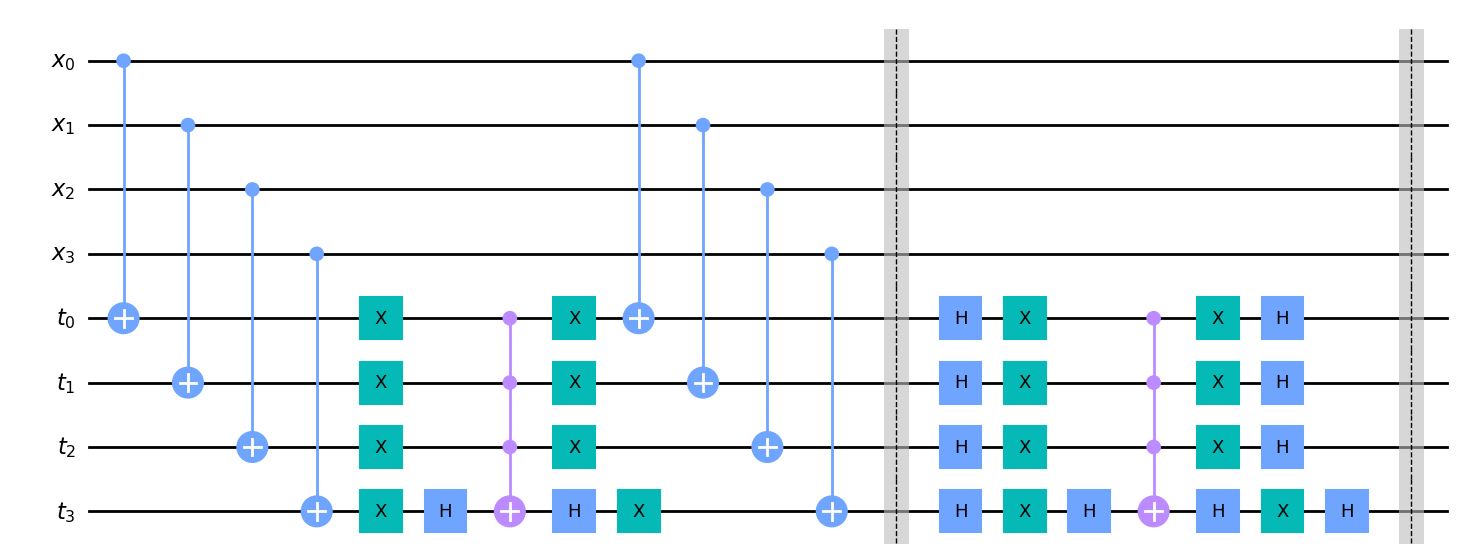

In [10]:
x  = QuantumRegister(4, name='x')
t  = QuantumRegister(4, name='t')
circuit = QuantumCircuit(x, t)


#Oracle

#CNOT
circuit.cx(x, t) 
#|0>-controlled-Z
circuit.x(t)
circuit.h(t[-1])
circuit.mct(t[:-1], t[-1])
circuit.h(t[-1])
circuit.x(t)
#CNOT
circuit.cx(x, t)        
circuit.barrier()


#Diffuser
#hadamard
circuit.h(t)
#X
circuit.x(t)
#controled-Z
circuit.h(t[-1])
circuit.mct(t[:-1], t[-1])
circuit.h(t[-1])
#X
circuit.x(t)
#Hadamard
circuit.h(t)
   
circuit.barrier()
circuit.draw('mpl')